# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]

試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]

仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5])

仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

path = "/Users/steven/Part02/"
df = pd.read_csv(path + "titanic_train.csv")

train_Y = df["Survived"]
df = df.drop(["Survived" , "PassengerId"] , axis = 1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
MMEncoder = MinMaxScaler()
LEncoder = LabelEncoder()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1,1))
df.head()



/Users/steven/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/steven/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/steven/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/steven/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/steven/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [3]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
estimator = GradientBoostingClassifier()
estimator.fit(df.values , train_Y)
feats = pd.Series(data = estimator.feature_importances_ , index = df.columns)
feats = feats.sort_values(ascending = False)
feats

Sex         0.444562
Pclass      0.111653
Ticket      0.097628
Fare        0.087457
Name        0.082349
Age         0.073720
Cabin       0.070997
Embarked    0.012246
Parch       0.011556
SibSp       0.007833
dtype: float64

# 先用梯度提升機對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1

將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [4]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator , train_X , train_Y , cv =5).mean()

0.8215972695810002

In [5]:
# 高重要性特徵 + 梯度提升樹 
high_features = ["Sex" , "Pclass" , "Ticket" , "Fare" , "Name" , "Age"]
train_X = MMEncoder.fit_transform(df[high_features])
cross_val_score(estimator , train_X , train_Y , cv =5 ).mean()

0.8215720903742021

# 作業2

將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

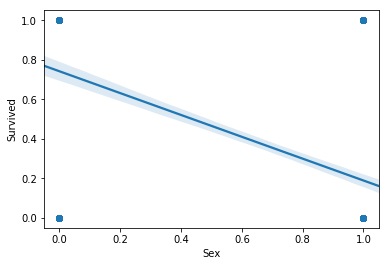

In [9]:
# 觀察重要特徵與目標的分布
import seaborn as sns
import matplotlib.pyplot as plt

# 第一名 : sex
sns.regplot(x = df["Sex"] , y = train_Y )
plt.show()


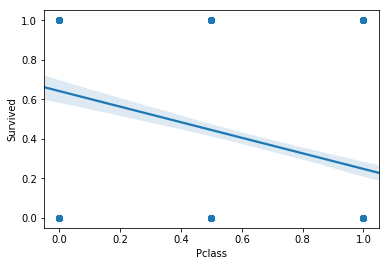

In [11]:
# 第二名 : Pclass
sns.regplot(x = df["Pclass"] , y = train_Y)
plt.show()

In [17]:
# 製作新特徵看效果
# 取乘客性別(Sex), 對船票等級(Pclass)做群聚編碼

df["Pclass"] = df["Pclass"].fillna('None')
df["Sex"] = df["Sex"].fillna('None')

mean_df = df.groupby(["Sex"])["Pclass"].mean().reset_index()
mode_df = df.groupby(["Sex"])["Pclass"].apply(lambda x : x.mode()[0]).reset_index()
median_df = df.groupby(["Sex"])["Pclass"].median().reset_index()

temp = pd.merge(mean_df , mode_df , how = 'left' , on = ["Sex"])
temp = pd.merge(temp , median_df , how = 'left' , on = ["Sex"])
temp.columns = ["Sex" , "Sex_Pclass_mean" , "Sex_Pclass_mode" , "Sex_Pclass_median"]

df_new = pd.merge(df , temp , how = 'left' , on = ["Sex"])
df_new = df_new.drop(["Sex"] , axis = 1)
df_new.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass_mean,Sex_Pclass_mode,Sex_Pclass_median
0,1.0,0.121348,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000,0.694974,1.0,1.0
1,0.0,0.213483,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333,0.579618,1.0,0.5
2,1.0,0.396629,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000,0.579618,1.0,0.5
3,0.0,0.305618,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000,0.579618,1.0,0.5
4,1.0,0.016854,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000,0.694974,1.0,1.0


In [18]:
train_X = MMEncoder.fit_transform(df_new)
cross_val_score(estimator , train_X , train_Y ,cv =5).mean()

0.8215972695810002